<a href="https://colab.research.google.com/github/xahram/catch_the_pink_flamingo/blob/main/assessment_bigdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys, os

sys.path
sys.executable





'/usr/bin/python3'

In [2]:
!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-8-jdk-headless is already the newest version (8u312-b07-0ubuntu1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [3]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

--2022-04-16 12:44:55--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz.3’

spark-3.2.1-bin-had 100%[===================>] 260.01M  31.5MB/s    in 8.9s    

2022-04-16 12:45:04 (29.2 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz.3’ saved [272637746/272637746]



In [4]:
!tar xf /content/spark-3.2.1-bin-hadoop2.7.tgz

In [5]:
!pip install -q findspark

In [6]:
import os

os.environ["JAVA_HOME"] =  "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"


import findspark

findspark.init()
findspark.find()


'/content/spark-3.2.1-bin-hadoop2.7'

In [7]:
import pyspark


sc = pyspark.SparkContext(master="local[*]", appName="FirstExample")




In [8]:
sc.setLogLevel("ERROR")

In [9]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local").appName("assessment_bigdata").config("spark.ui.port", "4050").getOrCreate()

In [10]:
spark

In [11]:
# UNZIPPING THE DATASET FILES


!unzip "/content/chat-data.zip"
!unzip "/content/combined-data.zip"



Archive:  /content/chat-data.zip
replace chat-data/chat_join_team_chat.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: chat-data/chat_join_team_chat.csv  
replace chat-data/chat_leave_team_chat.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: chat-data/chat_leave_team_chat.csv  
replace chat-data/chat_mention_team_chat.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: chat-data/chat_mention_team_chat.csv  
replace chat-data/chat_respond_team_chat.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: chat-data/chat_respond_team_chat.csv  
Archive:  /content/combined-data.zip
replace combined-data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: combined-data.csv       


In [12]:

buy_clicks_df = spark.read.csv("/content/flamingo-data/buy-clicks.csv", header=True, inferSchema=True)

In [13]:
buy_clicks_df.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- txId: integer (nullable = true)
 |-- userSessionId: integer (nullable = true)
 |-- team: integer (nullable = true)
 |-- userId: integer (nullable = true)
 |-- buyId: integer (nullable = true)
 |-- price: double (nullable = true)



In [14]:
buy_clicks_df.show(5)

+-------------------+----+-------------+----+------+-----+-----+
|          timestamp|txId|userSessionId|team|userId|buyId|price|
+-------------------+----+-------------+----+------+-----+-----+
|2016-05-26 15:36:54|6004|         5820|   9|  1300|    2|  3.0|
|2016-05-26 15:36:54|6005|         5775|  35|   868|    4| 10.0|
|2016-05-26 15:36:54|6006|         5679|  97|   819|    5| 20.0|
|2016-05-26 16:36:54|6067|         5665|  18|   121|    2|  3.0|
|2016-05-26 17:06:54|6093|         5709|  11|  2222|    5| 20.0|
+-------------------+----+-------------+----+------+-----+-----+
only showing top 5 rows



In [15]:
buy_clicks_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
timestamp,2947,None,None,2016-05-26 15:36:54,2016-06-16 10:36:54
txId,2947,25443.01085850017,9343.543792592367,6004,39842
userSessionId,2947,22884.75229046488,8669.35362676463,5652,39275
team,2947,70.31896844248388,40.27452540199273,2,178
userId,2947,1187.4591109602986,685.7038088341923,1,2387
buyId,2947,2.530709195792331,1.7799870722907862,0,5
price,2947,7.263997285374957,7.076313004712134,1.0,20.0


In [16]:
############################### EXPLORATORY DATA ANALYSIS

users_df = spark.read.csv("/content/flamingo-data/users.csv", header=True, inferSchema=True)
team_df = spark.read.csv("/content/flamingo-data/team.csv", header=True, inferSchema=True)
adclicks_df = spark.read.csv("/content/flamingo-data/ad-clicks.csv", header=True, inferSchema=True)
buyclicks_df = spark.read.csv("/content/flamingo-data/buy-clicks.csv", header=True, inferSchema=True)

users_df.show(5)





+-------------------+------+-----------+--------+----------+-------+
|          timestamp|userId|       nick| twitter|       dob|country|
+-------------------+------+-----------+--------+----------+-------+
|2012-06-19 14:53:41|   442|   pcjIOBKW|@SZhyOHv|1994-07-20|     BA|
|2012-06-19 19:29:01|   949|    vAOfUkf|  @nkkNo|1971-04-22|     HU|
|2012-06-20 19:34:59|  1654|     qOOXSQ|  @SwOlw|1970-04-19|     IS|
|2012-06-21 01:18:29|  1586|    px4gW51|@IrCHTnE|1965-11-23|     AM|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc| @VJj0Az|1994-08-23|     CC|
+-------------------+------+-----------+--------+----------+-------+
only showing top 5 rows



In [17]:
###### CONVERT DOB TO AGE

from pyspark.sql import functions as f



# Resource for below Code : https://stackoverflow.com/questions/62148704/date-difference-in-years-in-pyspark-dataframe

users_with_age_df = users_df.withColumn("age",   (f.months_between(f.current_date(), f.col('dob')) / 12).cast('int'))

users_with_age_df.show(5)



+-------------------+------+-----------+--------+----------+-------+---+
|          timestamp|userId|       nick| twitter|       dob|country|age|
+-------------------+------+-----------+--------+----------+-------+---+
|2012-06-19 14:53:41|   442|   pcjIOBKW|@SZhyOHv|1994-07-20|     BA| 27|
|2012-06-19 19:29:01|   949|    vAOfUkf|  @nkkNo|1971-04-22|     HU| 50|
|2012-06-20 19:34:59|  1654|     qOOXSQ|  @SwOlw|1970-04-19|     IS| 51|
|2012-06-21 01:18:29|  1586|    px4gW51|@IrCHTnE|1965-11-23|     AM| 56|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc| @VJj0Az|1994-08-23|     CC| 27|
+-------------------+------+-----------+--------+----------+-------+---+
only showing top 5 rows



In [18]:
list(users_with_age_df.toPandas()["age"].values)

[27,
 50,
 51,
 56,
 27,
 35,
 30,
 44,
 70,
 42,
 25,
 41,
 65,
 45,
 42,
 40,
 32,
 72,
 38,
 41,
 37,
 64,
 44,
 56,
 33,
 44,
 30,
 28,
 37,
 42,
 32,
 57,
 54,
 46,
 47,
 56,
 69,
 30,
 70,
 39,
 41,
 54,
 58,
 62,
 42,
 25,
 52,
 70,
 47,
 48,
 54,
 35,
 38,
 68,
 38,
 42,
 33,
 24,
 49,
 64,
 60,
 29,
 57,
 26,
 38,
 45,
 32,
 29,
 32,
 36,
 59,
 27,
 50,
 45,
 56,
 33,
 41,
 29,
 24,
 62,
 31,
 73,
 26,
 41,
 48,
 36,
 56,
 54,
 59,
 71,
 61,
 25,
 43,
 52,
 56,
 47,
 42,
 63,
 54,
 42,
 58,
 25,
 26,
 58,
 33,
 31,
 45,
 37,
 31,
 25,
 28,
 55,
 29,
 37,
 43,
 51,
 63,
 26,
 33,
 52,
 28,
 62,
 33,
 31,
 43,
 30,
 49,
 47,
 61,
 44,
 47,
 35,
 48,
 40,
 27,
 38,
 27,
 43,
 34,
 53,
 66,
 48,
 27,
 32,
 45,
 26,
 51,
 49,
 27,
 31,
 61,
 48,
 42,
 39,
 40,
 63,
 50,
 55,
 42,
 31,
 61,
 26,
 26,
 58,
 27,
 25,
 54,
 27,
 60,
 54,
 36,
 38,
 61,
 33,
 68,
 50,
 46,
 28,
 36,
 26,
 39,
 52,
 70,
 28,
 26,
 66,
 34,
 25,
 38,
 41,
 36,
 29,
 64,
 27,
 36,
 65,
 33,
 54,
 31,
 44,


In [19]:
users_with_age_df.toPandas()[["age"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,2393.0,45.078562,14.06871,23.0,33.0,43.0,56.0,75.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2119b940d0>]],
      dtype=object)

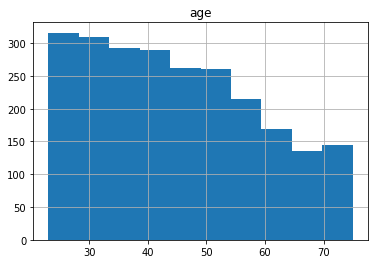

In [20]:
users_with_age_df.toPandas().hist(column = "age", bins = 10)




In [21]:
users_with_age_df.groupBy("country").count().orderBy("count").show(6)

+-------+-----+
|country|count|
+-------+-----+
|     UA|    9|
|     SD|    9|
|     EE|    9|
|     MR|    9|
|     CM|    9|
|     AZ|    9|
+-------+-----+
only showing top 6 rows



In [22]:
team_buying_df = team_df.alias("teamdf").join(buyclicks_df.alias("buyclicks"),\
                           f.col("teamdf.teamId") == f.col("buyclicks.team"),"inner")

-0.06938790495270436

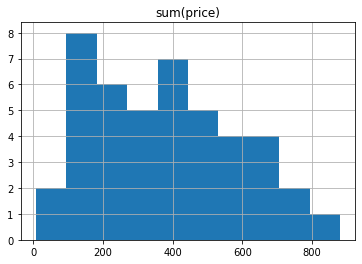

In [23]:
########## HISTOGRAM OF SPENDING COUNT HOW MUCH SPENDING IS DISTRIBUTED && CORRELATION

team_buying_df.groupBy("teamId").sum("price", "strength").orderBy("sum(price)").toPandas().hist(column = "sum(price)")

team_buying_df.stat.corr("price","strength")





In [24]:
!pip install pycountry_convert 

     |████████████████████████████████| 10.1 MB 57.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 297 kB 70.9 MB/s 
     |████████████████████████████████| 207 kB 59.2 MB/s 
     |████████████████████████████████| 297 kB 56.5 MB/s 
     |████████████████████████████████| 296 kB 61.5 MB/s 
     |████████████████████████████████| 296 kB 70.1 MB/s 
     |████████████████████████████████| 280 kB 74.4 MB/s 
     |████████████████████████████████| 280 kB 73.7 MB/s 
     |████████████████████████████████| 280 kB 61.4 MB/s 
     |████████████████████████████████| 280 kB 58.5 MB/s 
     |████████████████████████████████| 279 kB 56.8 MB/s 
     |████████████████████████████████| 279 kB 56.5 MB/s 
     |████████████████████████████████| 272 kB 56.6 MB/s 
     |████████████████████████████████| 272 kB 54.8 MB/s 
     |████████████████████████████████| 272 kB 57.2 MB/s 
   

In [25]:
############# TEAM SPENDING WITH AGE GROUP
team_user_buying_df = team_buying_df.alias("team_buying_df").join(users_df.alias("users_df"),\
                           f.col("team_buying_df.userId") == f.col("users_df.userId"),"inner")

In [26]:
import pycountry_convert as pc
from pyspark.sql.types import StringType



def country_to_continent(country_name):
  try:
    country_continent_code = pc.country_alpha2_to_continent_code(country_name)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name
  except:
    return "None"





udf_country_to_continent = f.udf(country_to_continent , StringType())
team_user_buying_df = team_user_buying_df.withColumn("continent", udf_country_to_continent(f.col("country") ))



team_user_buying_df.show()

+------+-----------+-------------------+-------------------+---------------+------------+-------------------+----+-------------+----+------+-----+-----+-------------------+------+----------+----------+----------+-------+-------------+
|teamId|       name|   teamCreationTime|        teamEndTime|       strength|currentLevel|          timestamp|txId|userSessionId|team|userId|buyId|price|          timestamp|userId|      nick|   twitter|       dob|country|    continent|
+------+-----------+-------------------+-------------------+---------------+------------+-------------------+----+-------------+----+------+-----+-----+-------------------+------+----------+----------+----------+-------+-------------+
|     9|  pDG2bAh8T|2016-06-13 17:39:55|9999-12-31 23:59:59| 0.952175553216|           1|2016-05-26 15:36:54|6004|         5820|   9|  1300|    2|  3.0|2013-12-01 09:30:47|  1300|   2hh0NNM|  @RY1URF2|1998-05-06|     GR|       Europe|
|    35|b3PqpjmZ6TT|2016-06-14 02:08:07|9999-12-31 23:59:59|

In [27]:
from pyspark.sql import Window
from pyspark.sql.functions import rank,sum,col


window = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)

team_user_buying_df_stat = team_user_buying_df.groupby("continent").agg(f.count('price').alias('spending_count'),
                                        f.mean('price').alias('price_avg'),
                                        f.min('price').alias('price_min'),
                                        f.max('price').alias('price_max')).\
   withColumn('total',sum(f.col('spending_count')).over(window)).\
   withColumn('Percent',f.col('spending_count')*100/f.col('total'))

team_user_buying_df_stat

DataFrame[continent: string, spending_count: bigint, price_avg: double, price_min: double, price_max: double, total: bigint, Percent: double]

In [28]:
team_user_buying_df_stat.show()

+-------------+--------------+------------------+---------+---------+-----+------------------+
|    continent|spending_count|         price_avg|price_min|price_max|total|           Percent|
+-------------+--------------+------------------+---------+---------+-----+------------------+
|         None|            60|              11.4|      1.0|     20.0| 2265|2.6490066225165565|
|       Europe|           394| 7.548223350253807|      1.0|     20.0| 2265|17.395143487858718|
|       Africa|           534| 7.282771535580524|      1.0|     20.0| 2265|23.576158940397352|
|North America|           359| 7.593314763231198|      1.0|     20.0| 2265|15.849889624724062|
|   Antarctica|            24|             2.125|      1.0|     10.0| 2265|1.0596026490066226|
|South America|           140|10.114285714285714|      1.0|     20.0| 2265| 6.181015452538631|
|      Oceania|           243| 5.802469135802469|      1.0|     20.0| 2265|10.728476821192054|
|         Asia|           511| 6.704500978473582| 

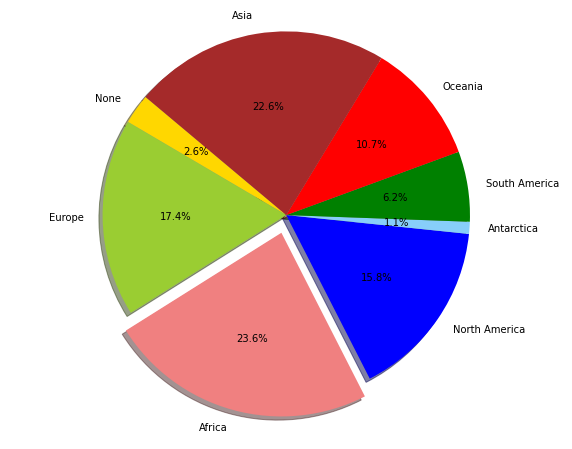

In [29]:
from re import X

######### PLOT PIE GRAPH OF HIGH SPENDING CONTINENTS
import matplotlib.pyplot as plt
import seaborn as sns


labels = list(team_user_buying_df_stat.toPandas()["continent"])
sizes =  list(team_user_buying_df_stat.toPandas()["Percent"])


colors = ['gold', 'yellowgreen', 'lightcoral','blue', 'lightskyblue','green','red', "brown"]
# explode = tuple( if X == 0 else x=0 for x in range(len(labels)) ) 

max = 0
for i in sizes:
  if max< i:
    max = i
  

explode = list(0 for _ in sizes)

explode[sizes.index(max)]  = 0.1

# 0, 0.1, 0, 0,0,0
# Plot
plt.figure(figsize=(10,8))
plt.pie(sizes,explode = explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [30]:
################### TEAM SPENDING AND TEAM RANK CORR



team_user_buying_df.show()
team_user_buying_df.stat.corr("price","currentLevel")






+------+-----------+-------------------+-------------------+---------------+------------+-------------------+----+-------------+----+------+-----+-----+-------------------+------+----------+----------+----------+-------+-------------+
|teamId|       name|   teamCreationTime|        teamEndTime|       strength|currentLevel|          timestamp|txId|userSessionId|team|userId|buyId|price|          timestamp|userId|      nick|   twitter|       dob|country|    continent|
+------+-----------+-------------------+-------------------+---------------+------------+-------------------+----+-------------+----+------+-----+-----+-------------------+------+----------+----------+----------+-------+-------------+
|     9|  pDG2bAh8T|2016-06-13 17:39:55|9999-12-31 23:59:59| 0.952175553216|           1|2016-05-26 15:36:54|6004|         5820|   9|  1300|    2|  3.0|2013-12-01 09:30:47|  1300|   2hh0NNM|  @RY1URF2|1998-05-06|     GR|       Europe|
|    35|b3PqpjmZ6TT|2016-06-14 02:08:07|9999-12-31 23:59:59|

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

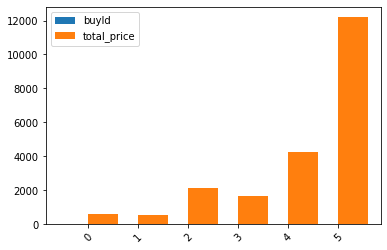

In [77]:
#################### AD CLICK CHECK 
###### CHECK WHICH ITEM SELLS WELL

from pyspark.sql.functions import rank,sum,col
# import matplotlib.pyplot as plt

adclicks_df = spark.read.csv("/content/flamingo-data/ad-clicks.csv", header=True, inferSchema=True)
buy_clicks_df = spark.read.csv("/content/flamingo-data/buy-clicks.csv", header=True, inferSchema=True)

item_purchases_stat_df = buy_clicks_df.groupby("buyId").agg(sum(f.col("price")).alias("total_price")).orderBy("buyId").toPandas()



item_purchase_stat_df = list(item_purchases_stat_df["buyId"])
plt.figsize=(12,11)
item_purchases_stat_df.plot.bar(width=1.2)
plt.xticks(rotation=45)
# buy_clicks_df.show()



<Figure size 1440x1440 with 0 Axes>

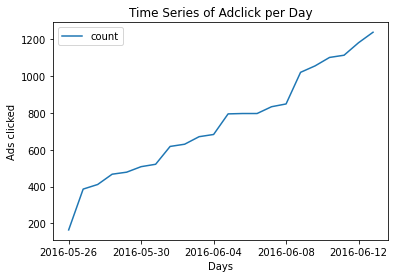

In [32]:
adclicks_df = spark.read.csv("/content/flamingo-data/ad-clicks.csv", header=True, inferSchema=True)


plt.figure(figsize=(20,20))
# adclicks_df.groupby("adCategory").count().orderBy("count").show()
adclicks_df.withColumn("tstamp",f.date_format(adclicks_df.timestamp,'yyyy-MM-dd') )\
.withColumn("hstamp",f.date_format(adclicks_df.timestamp,'hh:mm:ss') )\
.withColumn("month",f.date_format(adclicks_df.timestamp,'yyyy-MM-dd') )\
.select("month")\
.groupBy("month")\
.count()\
.orderBy("count")\
.toPandas()\
.plot.line(x="month", y="count", xlabel="Days", ylabel="Ads clicked", title="Time Series of Adclick per Day")\


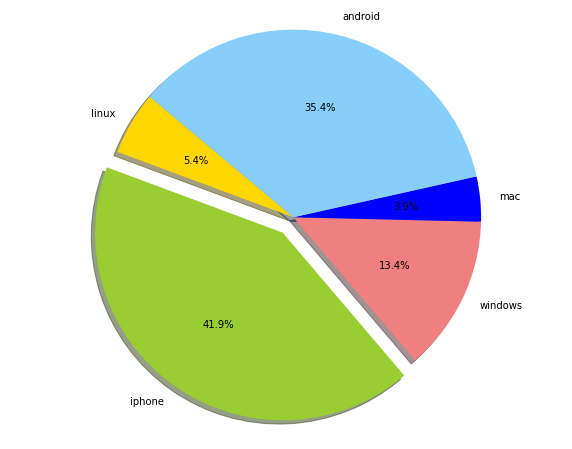

In [47]:
############## GET DEVICE PIE CHART


import matplotlib.pyplot as plt
import seaborn as sns




user_session_df = spark.read.csv("/content/flamingo-data/user-session.csv", header=True, inferSchema=True)
platform_usage_stats_df = user_session_df.groupBy("platformType").agg(f.mean("teamLevel").alias("average_rank"), 
                                            f.count("platformType").alias("total_platform_count")).orderBy("average_rank")


xlabels = list(platform_usage_stats_df.toPandas()["platformType"])
# platform_usage_stats_df.toPandas().plot.bar()

labels = list(platform_usage_stats_df.toPandas()["platformType"])
sizes =  list(platform_usage_stats_df.toPandas()["total_platform_count"])


colors = ['gold', 'yellowgreen', 'lightcoral','blue', 'lightskyblue','green','red', "brown"]
# explode = tuple( if X == 0 else x=0 for x in range(len(labels)) ) 

max = 0
for i in sizes:
  if max< i:
    max = i
  

explode = list(0 for _ in sizes)

explode[sizes.index(max)]  = 0.1

# 0, 0.1, 0, 0,0,0
# Plot
plt.figure(figsize=(10,8))
plt.pie(sizes,explode = explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()





[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'Count of time person joins a team'),
 Text(0.5, 1.0, 'Plot showing statistics of players joining teams')]

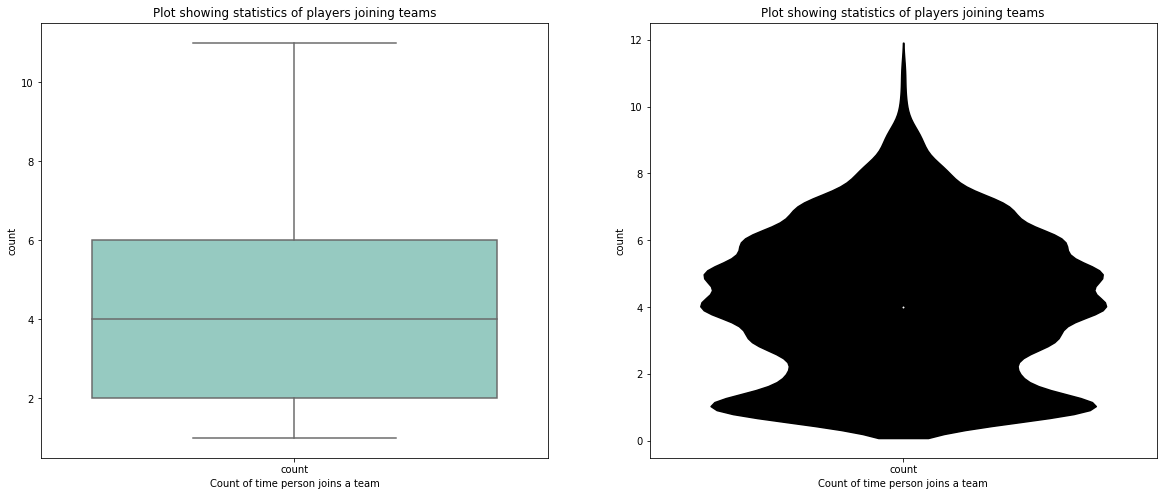

In [91]:
######################### CHECKING ON AVERAGE A PLAYER JOINS HOW MANY TEAMS
team_assigments = spark.read.csv("/content/flamingo-data/team-assignments.csv", header=True, inferSchema=True)


team_assigment_stats_df = team_assigments.groupBy("userId").agg(f.count("userId").alias("count")).select("count","userId").orderBy("count")
x = team_assigment_stats_df.select("count").toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x, palette="Set3")
ax.set(xlabel='Count of time person joins a team', ylabel='count', 
       title = "Plot showing statistics of players joining teams")



ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x, color = 'black')
ax.set(xlabel='Count of time person joins a team', ylabel='count', title = "Plot showing statistics of players joining teams")





[Text(0, 0, 'mac'),
 Text(0, 0, 'linux'),
 Text(0, 0, 'windows'),
 Text(0, 0, 'android'),
 Text(0, 0, 'iphone')]

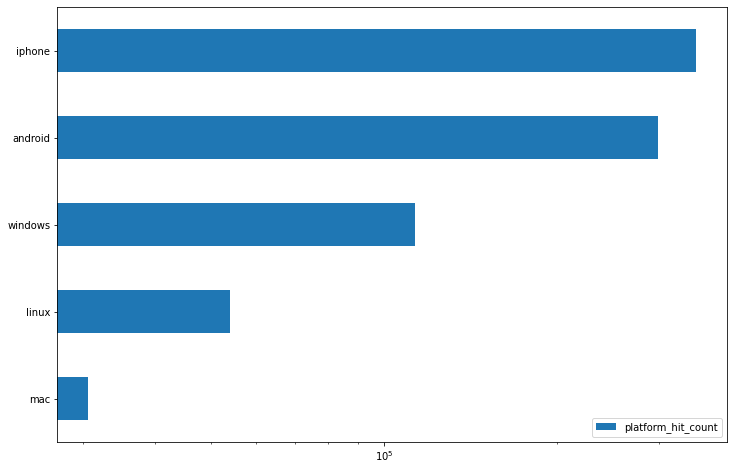

In [141]:
######################## CHECKING HIGHER RANK TEAMS PLAY WHICH EVENTS
######################### GAME CLICKS IS PLATFORM DEPENDANT

game_clicks_df = spark.read.csv("/content/flamingo-data/game-clicks.csv", header=True, inferSchema=True)
user_session_df = spark.read.csv("/content/flamingo-data/user-session.csv", header=True, inferSchema=True)



game_clicks_user_session_df = game_clicks_df.alias("game_clicks_df").join(user_session_df.alias("user_session_df"), 
                                            f.col("game_clicks_df.userid") == f.col("user_session_df.userId"), "inner")\
                                            


# https://stackoverflow.com/questions/49021972/pyspark-count-rows-on-condition




game_clicks_user_session_pf_df = game_clicks_user_session_df.groupby("platformType")\
                  .agg( f.sum( f.when(f.col("isHit") == 1, 1).otherwise(0)).alias("platform_hit_count") )\
                  .orderBy("platform_hit_count")
                  
ylabels = list(game_clicks_user_session_pf_df.toPandas()["platformType"]  )    
                  
game_clicks_user_session_pf_df.toPandas().plot(
                   kind='barh',
                  figsize=(12,8),
                  logx=True).set_yticklabels(ylabels)

# game_clicks_user_session_df.groupby("platformType").agg( f.count("isHit") )









In [ ]:
################ CLUSTERING ANALYSIS



